# In-patient Rehab Conditions
---

By: AJ Martinez

---

## Project Goals

Given 2021 rehab facility conditions data, identify what condidition has the most occurrences. This information will affect new training, safety rules and procedures.

---

## Project Description

Medicare wants to know what can we find from 2021 inpatient rehabilitation information. Simple question as to what was the leading condition, what state has the highest and lowest of it. This study will help on mandatory training decision, implementation of safety rules and procedures.

---

## Initial Questions

- What is the most occurring condition?
- What state has the highest number of it? What city?
- Which states has the lowest number of it? What city?
- What about region?
- Is there a relationship between city and condition?
- Is there a relationship between state and condition?
- Is there a relationship between region and condition?

---

## Importing the Required Modules

Everything we need to run the code blocks in this report are located in the util folder.
To run the code blocks in this report you will need numpy, pandas, matplotlib, seaborn and sklearn installed on your computer.

In [1]:
# Here we are importing everything needed to execute the code blocks in this notebook.
from wrangle import *
from final import *

# We would like to ignore any warnings that may be provided by our libraries.
import warnings
warnings.filterwarnings("ignore")

---

## Data Acquisition and Preparation

In this phase data is acquired from https://data.cms.gov/provider-data/dataset/ka5z-ibe3. The data is cached in a .csv file for faster loading and convenience. 

Column names needed to be fixed to remove spaces and uppercases. Some columns needed to change dtypes and some can be removed.
    
**Missing Values:**
<p>
For footnote column with missing values it was possible easy to add 0s 

A few rows unnecessary were removed 

In [2]:
# Here we will acquire, prepare data
df = clean_data()

# Here we'll split the dataframe 
train, validate, test = wrangle(df)

# Function details at wrangle.py

data has been split
(5931, 69) (2543, 69) (2119, 69)


---

## Exploration

With the data prepared and split we can begin exploring the data to identify which conditions are most occurring condition.

### Visualizations

In the visualizations below we aim to answer our initial questions. More details about how these visualization are created can be found in the explore.py file in the util directory.

#### What is the most occurring condition?

- all other conditions is the first 
- stroke is the second, but since it entails only one condition we'll select stroke

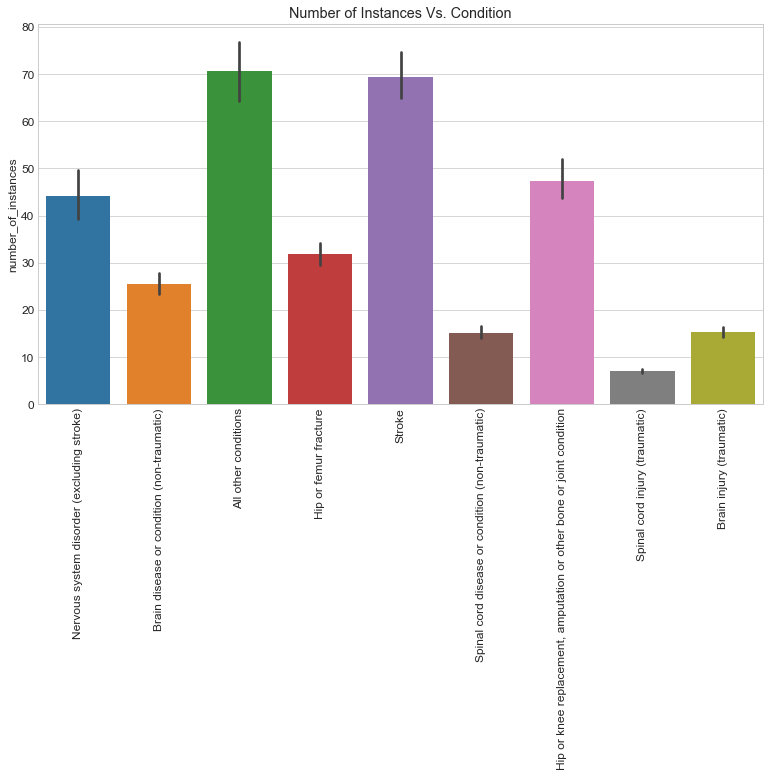

In [3]:
question1(train)

### What state has the highest number of it? What city?
- Texas is the highest state
- Houston is the highest city

data has been split
(5931, 69) (2543, 69) (2119, 69)


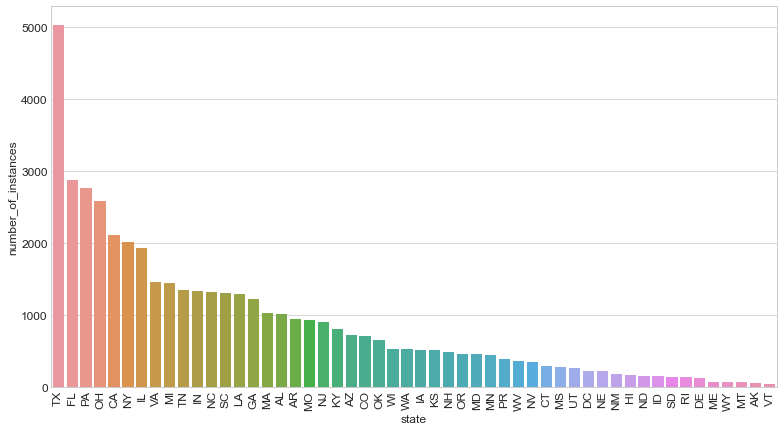

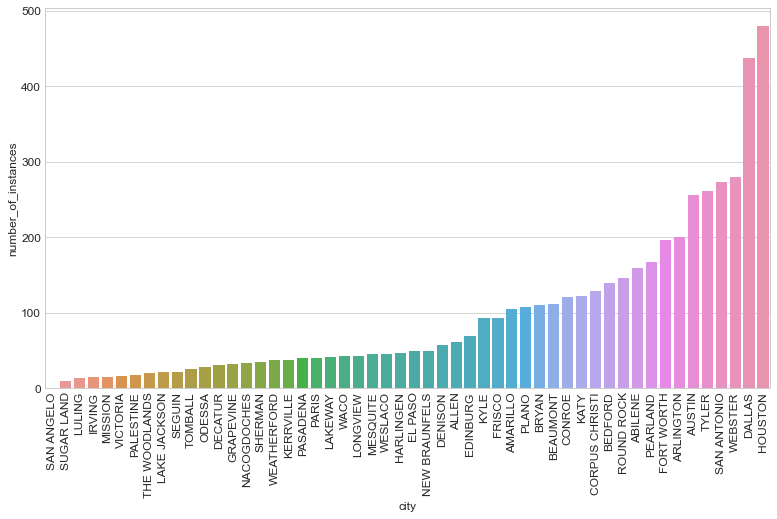

In [4]:
question2()

### Which states has the lowest number of it? What city?
- Lowest state is Vermont
- Windsor is the only city reporting 

data has been split
(5931, 69) (2543, 69) (2119, 69)


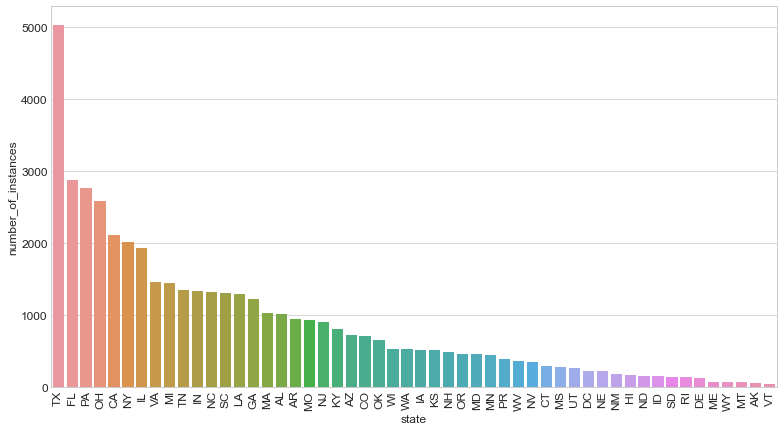

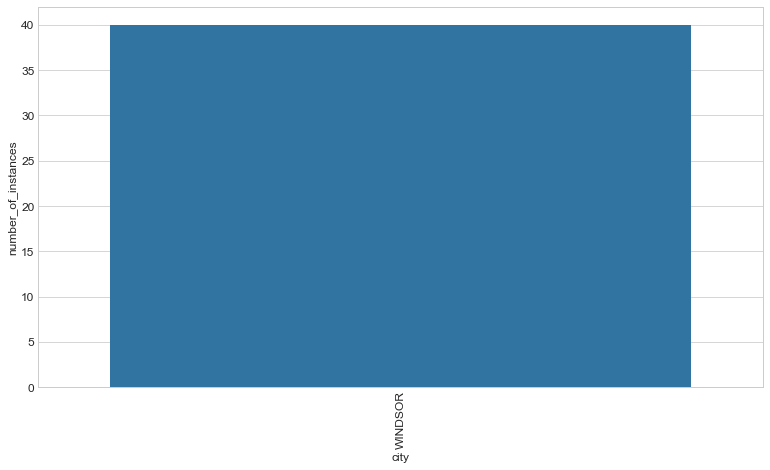

In [5]:
question3()

### What about region?
- Region 4 is the highest and region 10 is the lowest
- Region 4 includes Alabama, Florida, Georgia, Kentucky, Mississippi, North Carolina, South Carolina, Tennessee.
- Region 10 includes Alaska, Idaho, Oregon, Washington

data has been split
(5931, 69) (2543, 69) (2119, 69)


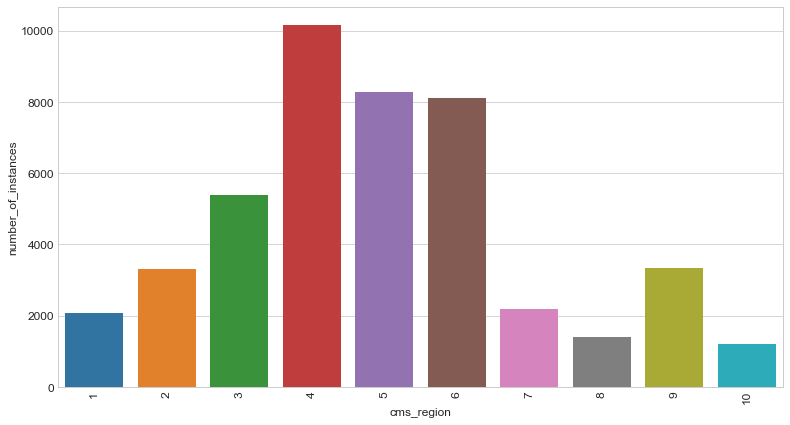

In [6]:
question4()

### Hypothesis Testing

Now we will perform statistical tests to determine if the there are relationships
Details on how these statistical tests are conducted can be found in the wrangle.py and modeling notebook files in the util directory.

$H_0$: There is no relationship between state and condition
<br>
$H_a$: There is a relationship between state and condition

In [7]:
# Here we are performing a correlation test
chi2_test(train.condition, train.state)


Fail to Reject H0


$H_0$: There is no relationship between region and condition
<br>
$H_a$: There is a relationship between region and condition

In [8]:
# Here we are performing a correlation test 
chi2_test(train.condition, train.cms_region)


Fail to Reject H0


---

## Modeling

Before building and training machine learning models the data needs to be all numerical values.

In [9]:
train.drop(columns=['cms_certification_number_(ccn)', 'city', 'state','county_name', 'condition', 'footnote', 'cms_region'], inplace=True)
validate.drop(columns=['cms_certification_number_(ccn)', 'city', 'state','county_name', 'condition', 'footnote', 'cms_region'], inplace=True)
test.drop(columns=['cms_certification_number_(ccn)', 'city', 'state','county_name', 'condition', 'footnote', 'cms_region'], inplace=True)

Now we split our dataset into X and y, where X contains the features used for predicting the target and y is the target variable.

In [10]:
# Here we split the train, validate, and test sets into X and y.

X_train = train.drop(columns = 'number_of_instances')
y_train = train.number_of_instances

X_validate = validate.drop(columns = 'number_of_instances')
y_validate = validate.number_of_instances

X_test = test.drop(columns = 'number_of_instances')
y_test = test.number_of_instances

### Baseline

In [11]:
baseline = pd.DataFrame({'mean' : [y_train.mean()] * y_train.size})

print(f'RMSE mean baseline: {mean_squared_error(y_train, baseline["mean"], squared = False)}')

RMSE mean baseline: 53.38885607974989


In [12]:
# features from KBest
features = ['condition_all_other_conditions', 'condition_spinal_cord_injury_(traumatic)', 'condition_stroke']

# baseline validation
baseline_val = pd.Series([y_train.mean()] * y_validate.size)

# create dictionary
results = {'baseline' : {
'RMSE' : mean_squared_error(y_train, baseline['mean'], squared = False),
'R^2' : r2_score(y_train, baseline['mean']),
'RMSE_val' : mean_squared_error(y_validate, baseline_val, squared = False),
'R^2_val' : r2_score(y_validate, baseline_val)}}


### Linear Regression Model

In [13]:
# linear regression
model = LinearRegression()
model.fit(X_train[features], y_train)
r2_score(y_train, model.predict(X_train[features]))

results['linear_regression'] = {
'RMSE' : mean_squared_error(y_train, model.predict(X_train[features]), squared = False),
'R^2' : r2_score(y_train, model.predict(X_train[features])),
'RMSE_val' : mean_squared_error(y_validate, model.predict(X_validate[features]), squared = False),
'R^2_val' : r2_score(y_validate, model.predict(X_validate[features]))}

### Polynomial Features Model

In [14]:
# plynomial features
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)
poly.fit(X_train[features])

X_train_poly = pd.DataFrame(
    poly.transform(X_train[features]),
    columns = poly.get_feature_names(X_train[features].columns),
    index = X_train[features].index)

model = LinearRegression()
model.fit(X_train_poly, y_train)

r2_score(y_train, model.predict(X_train_poly))

mean_squared_error(y_train, model.predict(X_train_poly), squared = False)


49.79931866334211

In [15]:
# polynomial validate
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)
poly.fit(X_validate[features])

X_validate_poly = pd.DataFrame(
    poly.transform(X_validate[features]),
    columns = poly.get_feature_names(X_validate[features].columns),
    index = X_validate[features].index)

results['polynomial_regression'] = {
'RMSE' : mean_squared_error(y_train, model.predict(X_train_poly), squared = False),
'R^2' : r2_score(y_train, model.predict(X_train_poly)),
'RMSE_val' : mean_squared_error(y_validate, model.predict(X_validate_poly), squared = False),
'R^2_val' : r2_score(y_validate, model.predict(X_validate_poly))}


### Tweedie Regressor Model

In [16]:
    # Tweedie Regressor
model = TweedieRegressor(power = 0, alpha = 0)
model.fit(X_train[features], y_train)

r2_score(y_train, model.predict(X_train[features]))

mean_squared_error(y_train, model.predict(X_train[features]), squared = False)

results['tweedie_regressor'] = {
'RMSE' : mean_squared_error(y_train, model.predict(X_train[features]), squared = False),
'R^2' : r2_score(y_train, model.predict(X_train[features])),
'RMSE_val' : mean_squared_error(y_validate, model.predict(X_validate[features]), squared = False),
'R^2_val' : r2_score(y_validate, model.predict(X_validate[features]))}
    

### Model Results

In [17]:
pd.DataFrame(results).T

,RMSE,R^2,RMSE_val,R^2_val
baseline,53.388856,0.000000,54.398349,-0.000055
linear_regression,49.797751,0.130002,51.002399,0.120909
polynomial_regression,49.799319,0.129947,50.997512,0.121078
tweedie_regressor,49.797751,0.130002,51.002398,0.120909


All the models performed well, however polynomial regression is the most consistent.

---
## Key Takeaways and Recommendations

All other conditions had the highest number of instances, however stroke was the highest single condition. We responded our initial questions easily, but we were unable to get a correlation. 


---

## Next Steps

Given time I would like break down into more states and have a breakdown of each state.